In [1]:
import numpy
import jax
import jax.numpy as np
jax.config.update("jax_enable_x64", True)

In [2]:
species_names = numpy.array(["U", "UA", "T", "TA", "D", "DA", "S", "SA", "D00", "DA0", "S00", "SA0", "D0A", "DAA", "S0A", "SAA", "A"])
rc_names = numpy.array(["kCIIAoffU", "kTU", "kSU", "kTUA", "kSUA", "kCIIAoffT",
            "kDT", "kUTA", "kDTA", "kCIIAoffD", "kRelD00", "kTDA", "kSDA",
            "kRelDA0", "kCIIAoffS", "kDS", "kRelS00", "kUSA", "kDSA",
            "kRelSA0", "kCIhydD00", "kCIIAoffDA0", "kCIAoffD0A",
            "kCIhydDA0", "kSDA0", "kCIAoffDAA", "kCIhydS00", "kDS00",
            "kCIIAoffSA0", "kCIAoffS0A", "kCIhydSA0", "kDSA0",
            "kCIAoffSAA", "kCIIAoffDAA", "kSDAA", "kDS0A", "kCIIAoffSAA",
            "kDSAA", "kCIIAonU", "kCIIAonT", "kCIIAonD", "kCIIAonS",
            "kCIIAonD00", "kCIIAonS00", "kCIAonD00", "kCIAonDA0",
            "kCIIAonD0A", "kCIAonS00", "kCIAonSA0", "kCIIAonS0A"])

## Species names
Species are input to the model as an array of numbers ordered as below, starting from UA and ending at SAA. U and A are omitted since their concentrations can be caluclated from the other species using conservation laws.

U: unphosphorylated, nothing bound to CII, nothing bound to CI  
UA: unphosphorylated, KaiA bound to CII, nothing bound to CI  
T: phosphothreonine, nothing bound to CII, nothing bound to CI  
TA: phosphothreonine, KaiA bound to CII, nothing bound to CI  
D: phosphothreonine + phosphoserine, nothing bound to CII, nothing bound to CI  
DA: phosphothreonine + phosphoserine, KaiA bound to CII, nothing bound to CI  
S: phosphoserine, nothing bound to CII, nothing bound to CI  
SA: phosphoserine, KaiA bound to CII, nothing bound to CI  
D00: phosphothreonine + phosphoserine, nothing bound to CII, KaiB bound to CI  
DA0: phosphothreonine + phosphoserine, KaiA bound to CII, KaiB bound to CI  
S00: phosphoserine, nothing bound to CII, KaiB bound to CI  
SA0: phosphoserine, KaiA bound to CII, KaiB bound to CI  
D0A: phosphothreonine + phosphoserine, nothing bound to CII, KaiB + KaiA bound to CI  
DAA: phosphothreonine + phosphoserine, KaiA bound to CII, KaiB + KaiA bound to CI  
S0A: phosphoserine, nothing bound to CII, KaiB + KaiA bound to CI  
SAA: phosphoserine, KaiA bound to CII, KaiB + KaiA bound to CI  
A: free KaiA

## Parameter names
The actual parameters taken as model inputs are natural log of the rates. Parameters are given as an array of numbers ordered as below, starting from kTU. kCIIAoffU is always set to 1 and omitted from the list to nondimensionalize.

0. kCIIAoffU: unbinding rate of KaiA from CII for UA
1. kTU: dephosphorylation rate of threonine for T  
2. kSU: dephosphorylation rate of serine for S  
3. kTUA: dephosphorylation rate of threonine for TA  
4. kSUA: dephosphorylation rate of serine for SA  
5. kCIIAoffT: unbinding rate of KaiA from CII for TA  
6. kDT: dephosphorylation rate of threonine for D  
7. kUTA: phosphorylation rate of threonine for UA  
8. kDTA: dephosphorylation rate of threonine for DA  
9. kCIIAoffD: unbinding rate of KaiA from CII for DA  
10. kRelD00: unbinding rate of KaiB from CI for D00  
11. kTDA: phosphorylation rate of serine for TA  
12. kSDA: phosphorylation rate of threonine for SA  
13. kRelDA0: unbinding rate of KaiB from CI for DA0  
14. kCIIAoffS: unbinding rate of KaiA from CII for SA  
15. kDS: dephosphorylation rate of threonine for D  
16. kRelS00: unbinding rate of KaiB from CI for S00  
17. kUSA: rate of serine phosphorylation for UA  
18. kDSA: rate of threonine dephosphorylation for DA  
19. kRelSA0: rate of KaiB unbinding from CI for SA0  
20. kCIhydD00: rate of KaiB binding to CI for D  
21. kCIIAoffDA0: rate of KaiA unbinding from CII for DA0  
22. kCIAoffD0A: rate of KaiA unbinding from CI for D0A  
23. kCIhydDA0: rate of KaiB binding to CI for DA  
24. kSDA0: rate of threonine phosphorylation for SA0  
25. kCIAoffDAA: rate of KaiA unbinding from CI of DAA  
26. kCIhydS00: rate of KaiB binding to CI of S  
27. kDS00: rate of serine dephosphorylation for D00  
28. kCIIAoffSA0: rate of KaiA unbinding from CII for SA0  
29. kCIAoffS0A: rate of KaiA unbinding from CI for S0A  
30. kCIhydSA0: rate of KaiB binding to CI for SA  
31. kDSA0: rate of threonine dephosphorylation for DA0  
32. kCIAoffSAA: rate of KaiA unbinding from CI for SAA  
33. kCIIAoffDAA: rate of KaiA unbinding from CII for SAA  
34. kSDAA: rate of threonine phosphorylation for SAA  
35. kDS0A: rate of threonine dephosphorylation for D0A  
36. kCIIAoffSAA: rate of KaiA unbinding from CII for SAA  
37. kDSAA: rate of threonine dephosphorylation for DAA  
38. kCIIAonU: rate of KaiA binding to CII for U  
39. kCIIAonT: rate of KaiA binding to CII for T  
40. kCIIAonD: rate of KaiA binding to CII for D  
41. kCIIAonS: rate of KaiA binding to CII for S  
42. kCIIAonD00: rate of KaiA binding to CII for D00  
43. kCIIAonS00: rate of KaiA binding to CII for S00  
44. kCIAonD00: rate of KaiA binding to CI for D00  
45. kCIAonDA0: rate of KaiA binding to CI for DA0  
46. kCIIAonD0A: rate of KaiA binding to CII for D0A  
47. kCIAonS00: rate of KaiA binding to CI for S00  
48. kCIAonSA0: rate of KaiA binding to CI for SA0  
49. kCIIAonS0A: rate of KaiA binding to CII for S0A

## How to model KaiA-CII and KaiB-CI binding competition?

Jenny Lin et al. argued in 2014 that the binding of KaiA to CII and binding of KaiB to CI are mutually exclusive (the evidence are "functional" i.e. indirect).
But I believe there are multiple lines of evidence pointing to that the two binding processes are antagonistic.


In [3]:
class KaiABC_nondim:

    n_dim = 15
    n_par = 49
    conservation_law = np.array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0.],
                                 [0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 1., 2., 1., 2., 1.]])
    not_algebraic = 1
    ind_ATP = np.array([7, 11, 12, 17, 20, 23, 26, 30])
    ind_C1_rxns = np.array([10, 13, 16, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 42, 43, 44, 45, 46, 47, 48, 49])
    ind_C2_rxns = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 11, 12, 14, 15, 17, 18, 38, 39, 40, 41])
    S = np.zeros((n_dim + conservation_law.shape[0], n_par + 1))

    S = S.at[0, 0].set(1)
    S = S.at[1, 0].set(-1)
    S = S.at[-1, 0].set(1)
    
    S = S.at[0, 1].set(1)
    S = S.at[2, 1].set(-1)
    
    S = S.at[0, 2].set(1)
    S = S.at[6, 2].set(-1)
    
    S = S.at[1, 3].set(1)
    S = S.at[3, 3].set(-1)
    
    S = S.at[1, 4].set(1)
    S = S.at[7, 4].set(-1)
    
    S = S.at[2, 5].set(1)
    S = S.at[3, 5].set(-1)
    S = S.at[-1, 5].set(1)
    
    S = S.at[2, 6].set(1)
    S = S.at[4, 6].set(-1)
    
    S = S.at[3, 7].set(1)
    S = S.at[1, 7].set(-1)
    
    S = S.at[3, 8].set(1)
    S = S.at[5, 8].set(-1)
    
    S = S.at[4, 9].set(1)
    S = S.at[5, 9].set(-1)
    S = S.at[-1, 9].set(1)
    
    S = S.at[4, 10].set(1)
    S = S.at[8, 10].set(-1)
    
    S = S.at[5, 11].set(1)
    S = S.at[3, 11].set(-1)
    
    S = S.at[5, 12].set(1)
    S = S.at[7, 12].set(-1)
    
    S = S.at[5, 13].set(1)
    S = S.at[9, 13].set(-1)
    
    S = S.at[6, 14].set(1)
    S = S.at[7, 14].set(-1)
    S = S.at[-1, 14].set(1)
    
    S = S.at[6, 15].set(1)
    S = S.at[4, 15].set(-1)
    
    S = S.at[6, 16].set(1)
    S = S.at[10, 16].set(-1)
    
    S = S.at[7, 17].set(1)
    S = S.at[1, 17].set(-1)
    
    S = S.at[7, 18].set(1)
    S = S.at[5, 18].set(-1)
    
    S = S.at[7, 19].set(1)
    S = S.at[11, 19].set(-1)
    
    S = S.at[8, 20].set(1)
    S = S.at[4, 20].set(-1)
    
    S = S.at[8, 21].set(1)
    S = S.at[9, 21].set(-1)
    S = S.at[-1, 21].set(1)
    
    S = S.at[8, 22].set(1)
    S = S.at[12, 22].set(-1)
    S = S.at[-1, 22].set(1)
    
    S = S.at[9, 23].set(1)
    S = S.at[5, 23].set(-1)
    
    S = S.at[9, 24].set(1)
    S = S.at[11, 24].set(-1)
    
    S = S.at[9, 25].set(1)
    S = S.at[13, 25].set(-1)
    S = S.at[-1, 25].set(1)
    
    S = S.at[10, 26].set(1)
    S = S.at[6, 26].set(-1)
    
    S = S.at[10, 27].set(1)
    S = S.at[8, 27].set(-1)
    
    S = S.at[10, 28].set(1)
    S = S.at[11, 28].set(-1)
    S = S.at[-1, 28].set(1)
    
    S = S.at[10, 29].set(1)
    S = S.at[14, 29].set(-1)
    S = S.at[-1, 29].set(1)
    
    S = S.at[11, 30].set(1)
    S = S.at[7, 30].set(-1)
    
    S = S.at[11, 31].set(1)
    S = S.at[9, 31].set(-1)
    
    S = S.at[11, 32].set(1)
    S = S.at[15, 32].set(-1)
    S = S.at[-1, 32].set(1)
    
    S = S.at[12, 33].set(1)
    S = S.at[13, 33].set(-1)
    S = S.at[-1, 33].set(1)
    
    S = S.at[13, 34].set(1)
    S = S.at[15, 34].set(-1)
    
    S = S.at[14, 35].set(1)
    S = S.at[12, 35].set(-1)
    
    S = S.at[14, 36].set(1)
    S = S.at[15, 36].set(-1)
    S = S.at[-1, 36].set(1)
    
    S = S.at[15, 37].set(1)
    S = S.at[13, 37].set(-1)
    
    S = S.at[1, 38].set(1)
    S = S.at[0, 38].set(-1)
    S = S.at[-1, 38].set(-1)
    
    S = S.at[3, 39].set(1)
    S = S.at[2, 39].set(-1)
    S = S.at[-1, 39].set(-1)
    
    S = S.at[5, 40].set(1)
    S = S.at[4, 40].set(-1)
    S = S.at[-1, 40].set(-1)
    
    S = S.at[7, 41].set(1)
    S = S.at[6, 41].set(-1)
    S = S.at[-1, 41].set(-1)
    
    S = S.at[9, 42].set(1)
    S = S.at[8, 42].set(-1)
    S = S.at[-1, 42].set(-1)
    
    S = S.at[11, 43].set(1)
    S = S.at[10, 43].set(-1)
    S = S.at[-1, 43].set(-1)
    
    S = S.at[12, 44].set(1)
    S = S.at[8, 44].set(-1)
    S = S.at[-1, 44].set(-1)
    
    S = S.at[13, 45].set(1)
    S = S.at[9, 45].set(-1)
    S = S.at[-1, 45].set(-1)
    
    S = S.at[13, 46].set(1)
    S = S.at[12, 46].set(-1)
    S = S.at[-1, 46].set(-1)
    
    S = S.at[14, 47].set(1)
    S = S.at[10, 47].set(-1)
    S = S.at[-1, 47].set(-1)
    
    S = S.at[15, 48].set(1)
    S = S.at[11, 48].set(-1)
    S = S.at[-1, 48].set(-1)
    
    S = S.at[15, 49].set(1)
    S = S.at[14, 49].set(-1)
    S = S.at[-1, 49].set(-1)
    
    K = np.where(S < 0, -S, 0)

    def __init__(self, par, a0=6/35, ATPfrac=1.):

        self.a0 = a0
        self.ATPfrac = ATPfrac
        self.par = par

    @jax.jit
    def f(self, t, y, par=None, a0=None, ATPfrac=None):

        if par is None:
            par = self.par
        if a0 is None:
            a0 = self.a0
        if ATPfrac is None:
            ATPfrac = self.ATPfrac

        par = np.pad(par, (1, 0))
        yfull = np.zeros(self.n_dim + self.conservation_law.shape[0])
        yfull = yfull.at[0].set(1 - self.conservation_law[0, 1:-1]@y)
        yfull = yfull.at[1:-1].set(y)
        yfull = yfull.at[-1].set(a0 - self.conservation_law[1, 1:-1]@y)
        ydot = self.S@(np.exp(par).at[self.ind_ATP].multiply(ATPfrac) * np.prod(yfull**self.K.T, axis=1))
        return ydot[1:-1]

    @jax.jit
    def jac(self, t, y, par=None, a0=None, ATPfrac=None):
        return jax.jacfwd(self.f, argnums=1)(t, y, par, a0, ATPfrac)

    @jax.jit
    def ravel(self):
        return np.zeros(0)

    def _tree_flatten(self):
        children = (self.par, self.a0, self.ATPfrac)
        aux_data = {}
        return (children, aux_data)

    @classmethod
    def _tree_unflatten(cls, aux_data, children):
        return cls(*children, **aux_data)
    
jax.tree_util.register_pytree_node(KaiABC_nondim, KaiABC_nondim._tree_flatten, KaiABC_nondim._tree_unflatten)

In [17]:
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# read parameters
params = numpy.load("chris_KaiABC_params.npy")

# pick one set of parameters
model = KaiABC_nondim(params[2])

# initial condition
P0 = numpy.zeros(model.n_dim)

# time span
tmax = 2e3
tspan = numpy.linspace(0., tmax, 1001)

# integration
sol = odeint(lambda y, t: model.f(t, y), P0, tspan)

Save the values as text file

In [21]:
import pandas as pd

In [23]:
pd.DataFrame(params).to_csv("src/kaiabc_chi_params.csv", index=False)

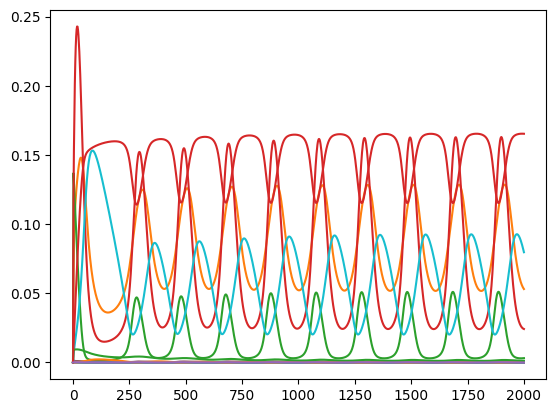

In [5]:
plt.plot(tspan, sol)
plt.show()

Test the Julia code

In [26]:
model = KaiABC_nondim(params[0], a0=1.)

In [29]:
X0 = numpy.ones(model.n_dim)*0.1
model.f(None, X0)

DeviceArray([-28.48290377,  19.73258449,  11.33313014,   8.51254219,
              -2.84786196, -13.65527266,  -7.63845043,   1.32420178,
              68.83046871,  59.02912965, -73.72047133,  23.49819078,
             -24.90902137, -16.09856543, -20.19974921], dtype=float64)

In [42]:
from scipy.integrate import solve_ivp

[ -1.18311977  -2.70177966   6.04315621   4.66285666   9.63824609
  -0.19375136 -17.42401411   0.18529876  -8.65304941  -1.1678947
  11.20644287  -1.1682212    2.34180557   0.7634252   -0.27045159]


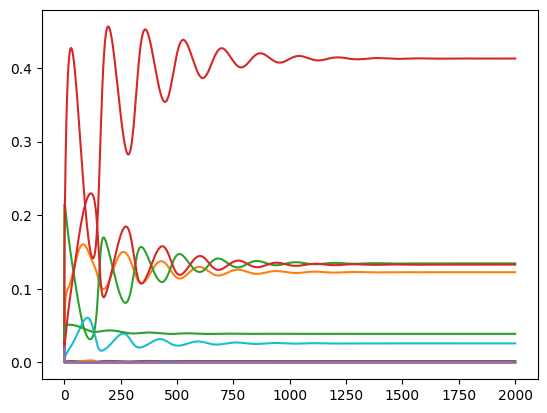

In [71]:
# pick one set of parameters
model = KaiABC_nondim(params[2], a0=0.35, ATPfrac=0.8)

# initial condition
X0 = 0.02*numpy.ones(model.n_dim)

# time span
tmax = 2e3
# tspan = numpy.linspace(0., tmax, 1001)

# Print initial derivatives
print(model.f(None, X0))

# integration
sol = solve_ivp(model.f, (0., tmax), X0, method="Radau", t_eval=numpy.linspace(0., tmax, 5001))
# sol = odeint(lambda y, t: model.f(t, y), P0, tspan)

plt.plot(sol.t, sol.y.T)
plt.show()